In [1]:
pip install h2o


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: /Users/raees/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning/H2O
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [2]:
import os

untitled_folder_path = os.path.join(os.path.abspath('..'), 'untitled folder')

In [3]:
file_path = os.path.join(os.path.join(os.path.abspath('..'), 'untitled folder'), "log2.csv")


In [4]:
df = pd.read_csv(file_path)
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


Target Distribution

Absolute Frequencies:
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

Percentages:
Action
allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: proportion, dtype: float64


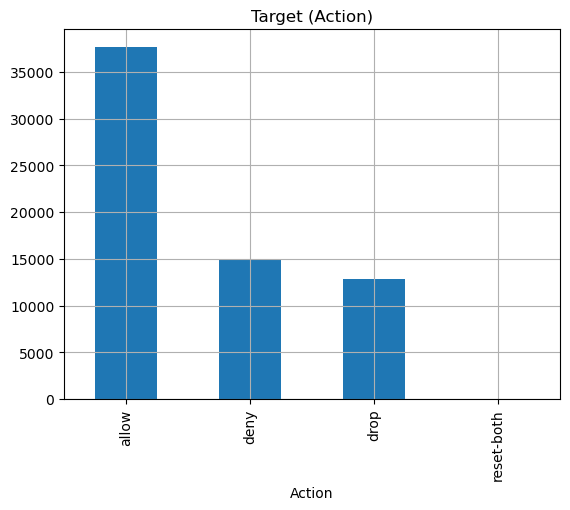

In [5]:
# target distribution
print('Absolute Frequencies:')
print(df.Action.value_counts())
print()

print('Percentages:')
print(df.Action.value_counts(normalize=True))

df.Action.value_counts().plot(kind='bar')
plt.title('Target (Action)')
plt.grid()
plt.show()

# Feature Exploration

In [6]:
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']

In [7]:
# define log trafo for numerical features
def num_trafo(x):
    return np.log10(1+x)

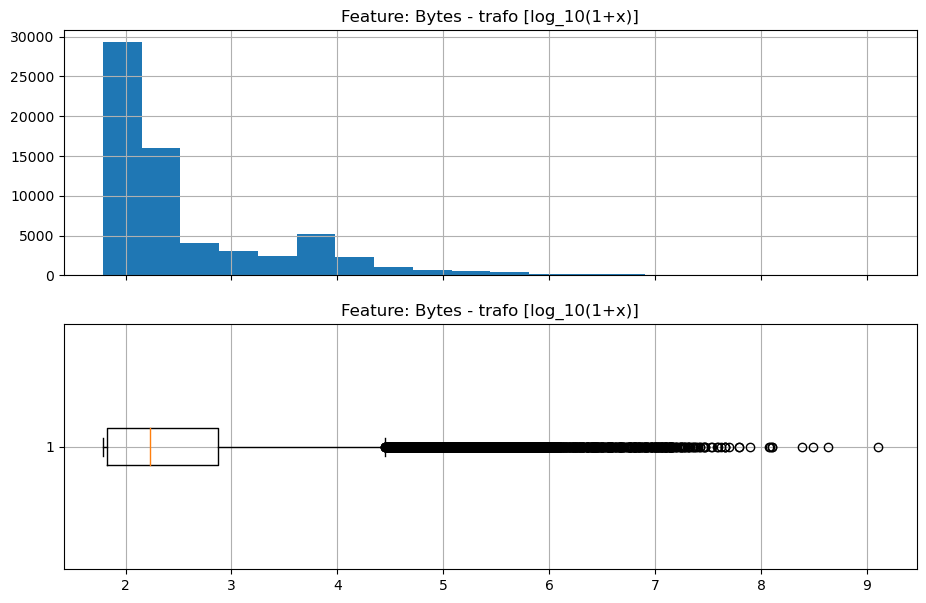

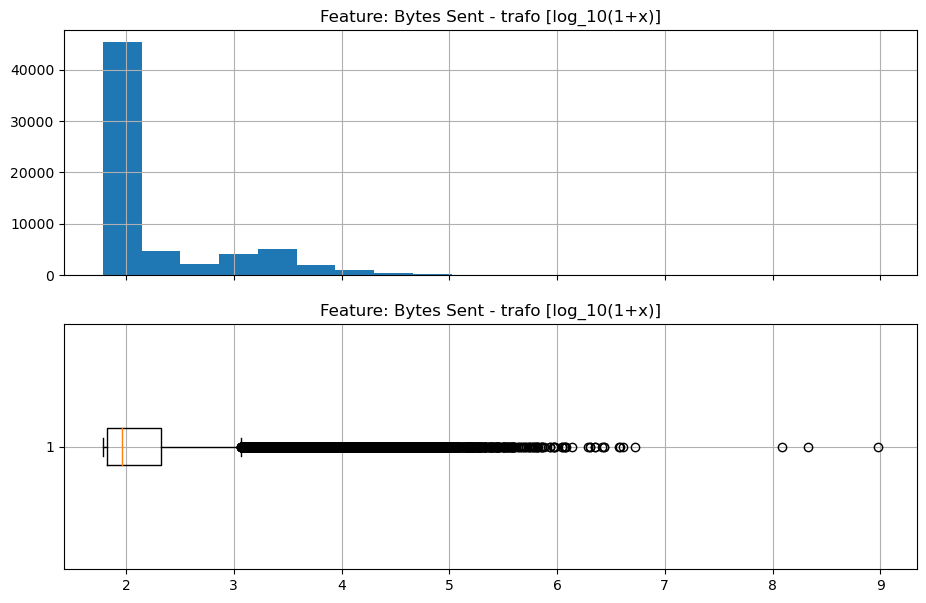

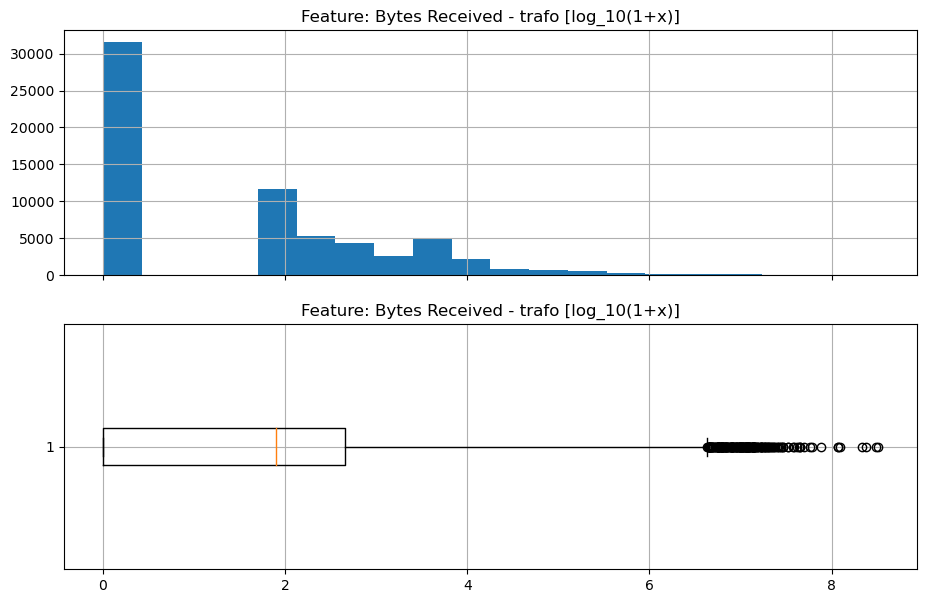

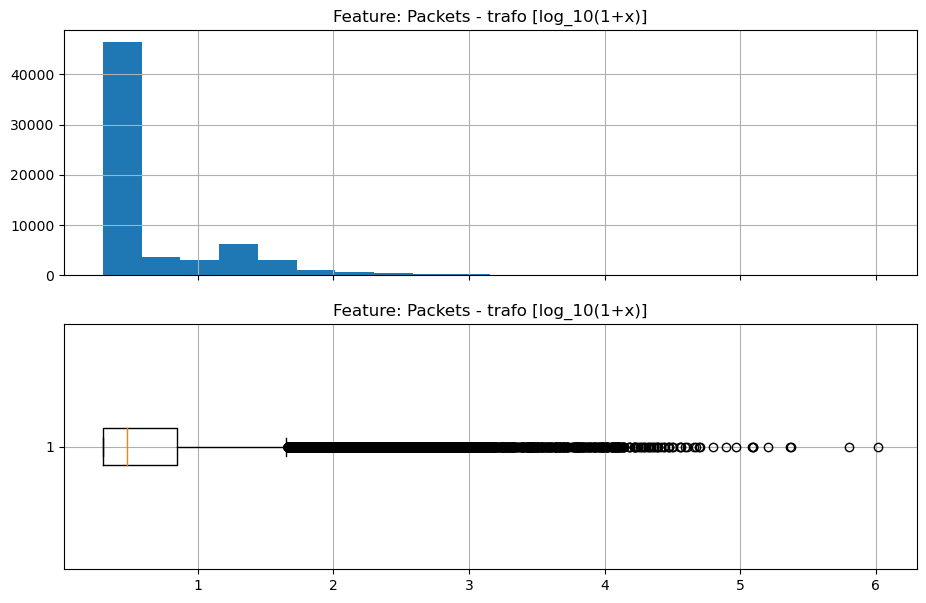

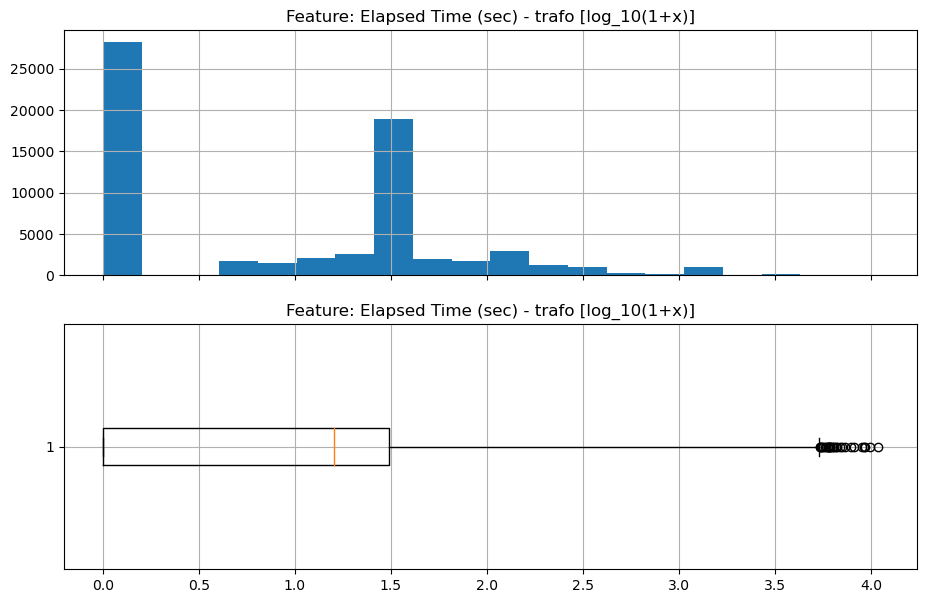

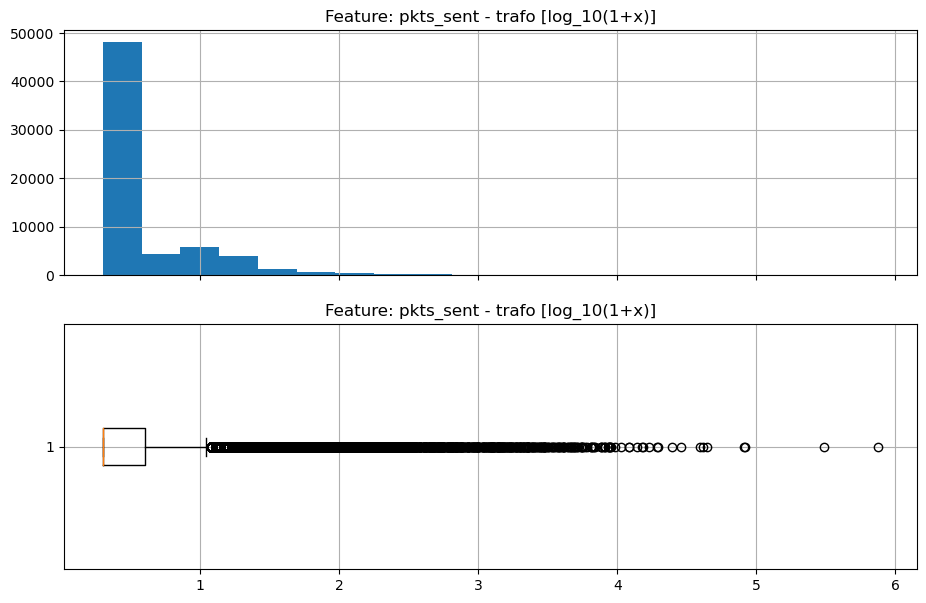

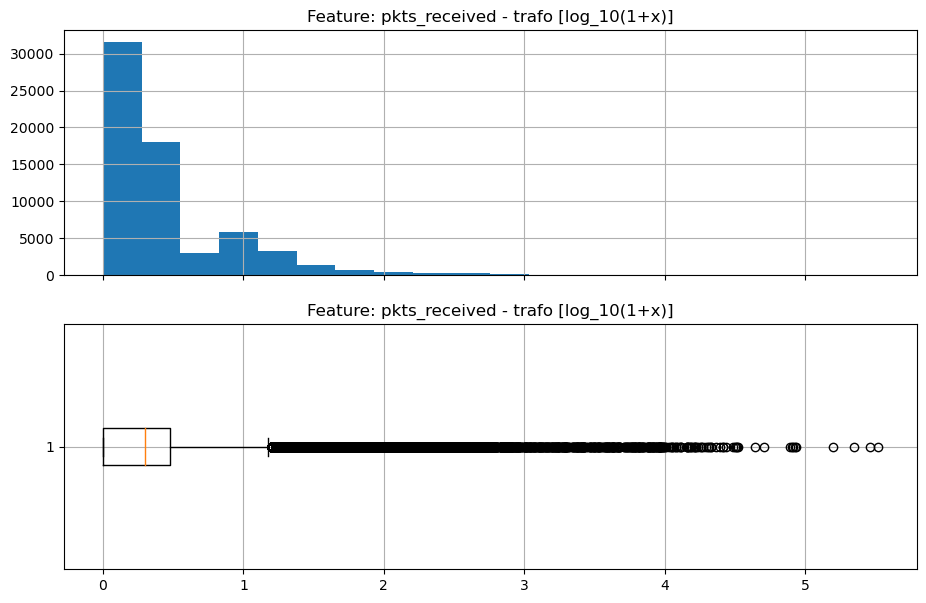

In [8]:
# plot distribution of numerical features
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,7), sharex=True)
    ax1.hist(num_trafo(df[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    ax2.boxplot(num_trafo(df[f]), vert=False)
    ax2.grid()   
    ax2.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    plt.show()

Categorical Features

In [9]:
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']


Feature: Source Port
Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: count, dtype: int64



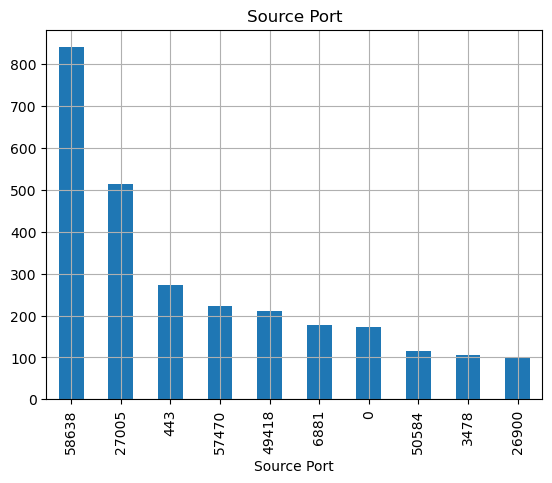

Feature: Destination Port
Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: count, dtype: int64



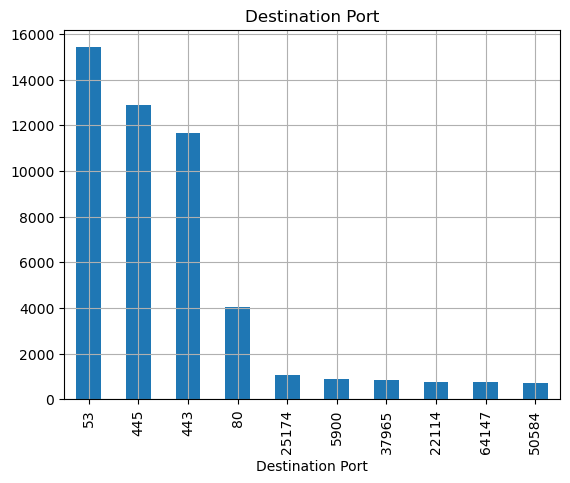

Feature: NAT Source Port
NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
Name: count, dtype: int64



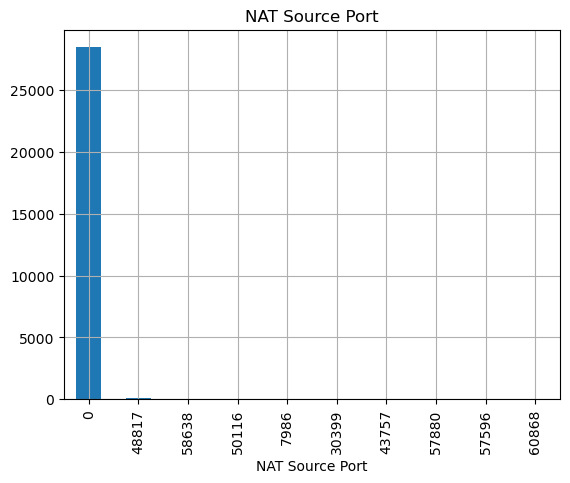

Feature: NAT Destination Port
NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: count, dtype: int64



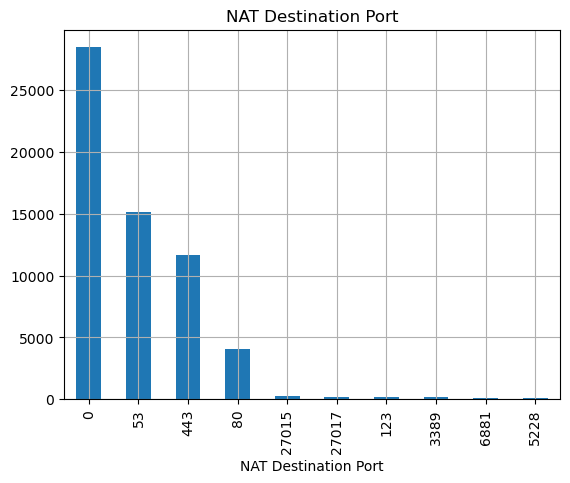

In [10]:
# show only top 10 levels for each feature
for f in features_cat:
    print('Feature:', f)
    print(df[f].value_counts()[0:10])
    print()
    df[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

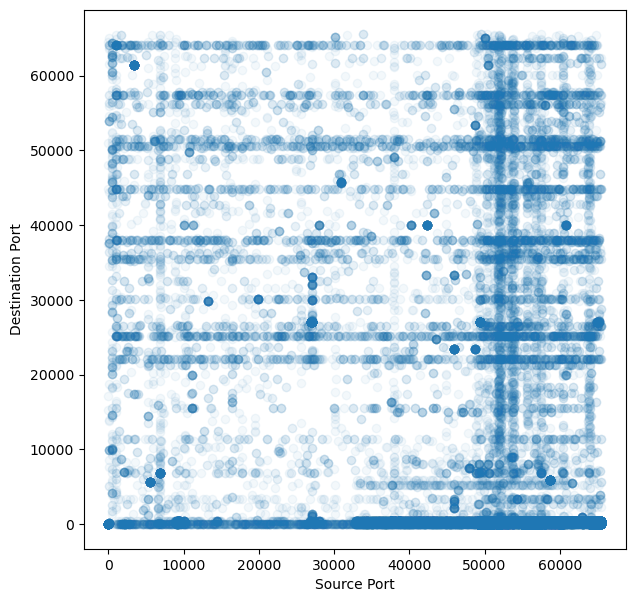

In [11]:
# Source/Destination
plt.figure(figsize=(7,7))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

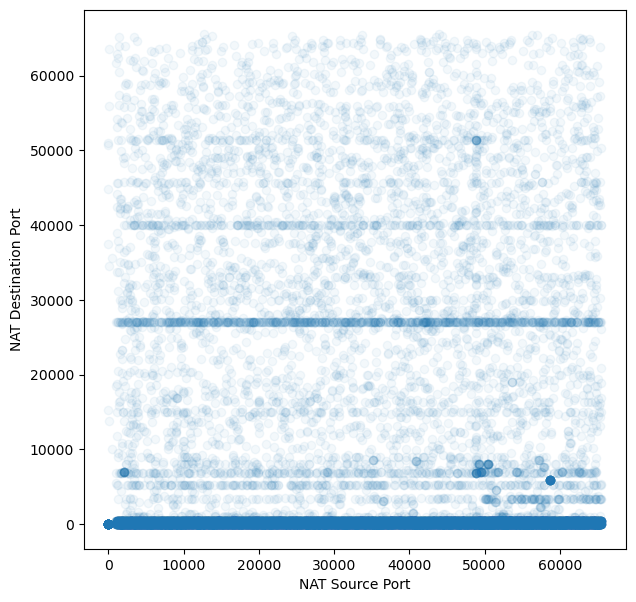

In [12]:
# Source/Destination NAT (Network Address Translation)
plt.figure(figsize=(7,7))
plt.scatter(df['NAT Source Port'], df['NAT Destination Port'], alpha=0.05)
plt.xlabel('NAT Source Port')
plt.ylabel('NAT Destination Port')
plt.show()